In [26]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv('Wave7.csv')
data.head()

,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,S007,J_INTDATE,FW_START,FW_END,K_TIME_START,K_TIME_END,K_DURATION,Q_MODE,N_REGION_ISO,N_REGION_WVS,N_REGION_NUTS2,N_REG_NUTS1,N_TOWN,G_TOWNSIZE,G_TOWNSIZE2,H_SETTLEMENT,H_URBRURAL,I_PSU,O1_LONGITUDE,O2_LATITUDE,L_INTERVIEWER_NUMBER,S_INTLANGUAGE,LNGE_ISO,E_RESPINT,F_INTPRIVACY,E1_LITERACY,W_WEIGHT,S018,PWGHT,S025,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q33_3,Q34,Q34_3,Q35,Q35_3,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q82_AFRICANUNION,Q82_APEC,Q82_ARABLEAGUE,Q82_ASEAN,Q82_CIS,Q82_CUSMA,Q82_ECO,Q82_EU,Q82_GULFCOOP,Q82_ISLCOOP,Q82_MERCOSUR,Q82_NAFTA,Q82_OAS,Q82_SAARC,Q82_SCO,Q82_TLC,Q82_UNDP,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q94R,Q95,Q95R,Q96,Q96R,Q97,Q97R,Q98,Q98R,Q99,Q99R,Q100,Q100R,Q101,Q101R,Q102,Q102R,Q103,Q103R,Q104,Q104R,Q105,Q105R,Q106,Q107,Q108,Q109,Q110,Q111,Q112,Q113,Q114,Q115,Q116,Q117,Q118,Q119,Q120,Q121,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q130,Q131,Q132,Q133,Q134,Q135,Q136,Q137,Q138,Q139,Q140,Q141,Q142,Q143,Q144,Q145,Q146,Q147,Q148,Q149,Q150,Q151,Q152,Q153,Q154,Q155,Q156,Q157,Q158,Q159,Q160,Q161,Q162,Q163,Q164,Q165,Q166,Q167,Q168,Q169,Q170,Q171,Q172,Q172R,Q173,Q174,Q175,Q176,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185,Q186,Q187,Q188,Q189,Q190,Q191,Q192,Q193,Q194,Q195,Q196,Q197,Q198,Q199,Q200,Q201,Q202,Q203,Q204,Q205,Q206,Q207,Q208,Q209,Q210,Q211,Q212,Q213,Q214,Q215,Q216,Q217,Q218,Q219,Q220,Q221,Q222,Q223,Q223_ABREV,Q223_LOCAL,Q224,Q225,Q226,Q227,Q228,Q229,Q230,Q231,Q232,Q233,Q234,Q234A,Q235,Q236,Q237,Q238,Q239,Q240,Q241,Q242,Q243,Q244,Q245,Q246,Q247,Q248,Q249,Q250,Q251,Q252,Q253,Q254,Q255,Q256,Q257,Q258,Q259,Q260,Q261,Q262,X003R,X003R2,Q263,Q264,V002,Q265,V001,Q266,X002_02B,Q267,V002A_01,Q268,V001A_01,Q269,Q270,Q271,Q272,Q273,Q274,Q275,Q275A,Q275R,Q276,Q276A,Q276R,Q277,Q277A,Q277R,Q278,Q278A,Q278R,Q279,Q280,Q281,Q282,Q283,Q284,Q285,Q286,Q287,Q288,Q288R,Q289,Q289CS9,Q290,Q291G1,Q291G2,Q291G3,Q291G4,Q291G5,Q291G6,Q291P1,Q291P2,Q291P3,Q291P4,Q291P5,Q291P6,Q291UN1,Q291UN2,Q291UN3,Q291UN4,Q291UN5,Q291UN6,Q292A,Q292B,Q292C,Q292D,Q292E,Q292F,Q292G,Q292H,Q292I,Q292J,Q292K,Q292L,Q292M,Q292N,Q292O,Q293,Q294A,Q294B,Y001,Y002,Y003,SACSECVAL,RESEMAVAL,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,SECVALWGT,RESEMAVALWGT,fhregion,polregfh,freestfh,prfhrat,prfhscore,clfhrat,clfhscore,democ,autoc,polity,durable,regtype,ruleoflaw,corrupttransp,electintegr,btiregion,btistatus,btidemstatus,btistate,btipolpart,btiruleoflaw,btistability,btiintegration,btimarket,btigovindex,btigoveperform,btiregime,regionWB,incomeWB,landWB,GDPpercap1,GDPpercap2,giniWB,incrichest10p,popWB1990,popWB2000,popWB2019,lifeexpect,popgrowth,urbanpop,laborforce,deathrate,unemployfem,unemploymale,unemploytotal,accessclfuel,accesselectr,renewelectr,co2emis,co2percap,easeofbusiness,militaryexp,Trade,healthexp,educationexp,medageun,meanschooling,educationHDI,compulseduc,GII,DGI,womenparl,hdi,incomeindexHDI,humanineqiality,lifeexpectHDI,homiciderate,Refugeesorigin,internetusers,mobphone,migrationrate,schoolgpi,femchoutsch,choutsch,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2xel_frefair,v2xcl_rol,v2x_cspart,v2xeg_eqdr,v2excrptps,v2exthftps,v2juaccnt,v2cltrnslw,v2clacjust,v2clsocgrp,v2clacfree,v2clrelig,v2csrlgrep,v2mecenefm,v2mecenefi,v2mebias,v2pepwrses,v2pepwrgen,v2peedueq,v2pehealth,v2peapsecon,v2peasjsoecon,v2clgencl,v2peasjgen,v2peasbgen,v2cafres,v2cafexch,v2x_corr,v2x_gender,v2x_gencl,v2x_genpp,v2x_rul

In [28]:
data.columns

Index(['version', 'doi', 'A_WAVE', 'A_YEAR', 'A_STUDY', 'B_COUNTRY',
       'B_COUNTRY_ALPHA', 'C_COW_NUM', 'C_COW_ALPHA', 'D_INTERVIEW',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=613)

In [29]:
data.shape

(97220, 613)

In [73]:
# countries = data[(data['B_COUNTRY_ALPHA'] == 'IND') | (data['B_COUNTRY_ALPHA'] == 'USA') | (data['B_COUNTRY_ALPHA'] == 'DEU')]

data[(data['B_COUNTRY_ALPHA'] == 'USA')].shape

(2596, 613)

In [95]:
countries = data[(data['B_COUNTRY_ALPHA'] == 'USA')]
countries.reset_index(drop = True, inplace = True)

cat_cols = list(set(countries.columns)-{'Y001','Y002','Y003','SACSECVAL', 'RESEMAVAL','I_AUTHORITY',  'I_NATIONALISM',  'I_DEVOUT',  'DEFIANCE',  'I_RELIGIMP',  'I_RELIGBEL',  'I_RELIGPRAC',  'DISBELIEF',  'I_NORM1',  'I_NORM2',  'I_NORM3',  'RELATIVISM',  'I_TRUSTARMY',  'I_TRUSTPOLICE',  'I_TRUSTCOURTS',  'SCEPTICISM',  'I_INDEP',  'I_IMAGIN',  'I_NONOBED',  'AUTONOMY',  'I_WOMJOB',  'I_WOMPOL',  'I_WOMEDU',  'EQUALITY',  'I_HOMOLIB',  'I_ABORTLIB',  'I_DIVORLIB',  'CHOICE',  'I_VOICE1',  'I_VOICE2',  'I_VOI2_00',  'VOICE',  'SECVALWGT',  'RESEMAVALWGT'})
# countries.fillna(-1, inplace=True)
countries[cat_cols] = countries[cat_cols].astype('category')

pd.options.display.max_columns = None


required_cols = ['D_INTERVIEW','Q222','Q221','Q48','Q49','Q50','Q260','Q262','Q263','Q274','Q288','Q275','Q164','Q172R','Q177','Q178','Q179','Q180','Q181','Q182','Q183','Q184','Q185','Q186','Q187','Q188','Q189','Q190','Q191','Q192','Q193','Q194','Q195']
countries = countries[required_cols]

ethical_values = ['Q177','Q178','Q179','Q180','Q181','Q182','Q183','Q184','Q185','Q186','Q187','Q188','Q189','Q190','Q191','Q192','Q193','Q194','Q195']

# reverse the score for columns such that in the end 1 is bad and 10 is good
reverse_scoring = ['Q177','Q178','Q179','Q180','Q181','Q183','Q187','Q188','Q189','Q190','Q191','Q192','Q194','Q195']

for col in ethical_values:
    countries[col] = pd.to_numeric(countries[col], errors='coerce')  # Convert to numeric, NaNs for invalid
    countries[col] = countries[col].where(countries[col] >= 0, np.nan)  # Replace negative values with NaN

for col in reverse_scoring:
    countries[col] = 11 - countries[col]

# Ethics score is the average score of all questions
countries['ethics_score'] = countries[ethical_values].mean(axis=1)

# Normalized ethics score
min_score = countries['ethics_score'].min()
max_score = countries['ethics_score'].max()
countries['ethics_score'] = 10 * (countries['ethics_score'] - min_score) / (max_score - min_score)

# fill null values with mean
countries['ethics_score'].fillna(countries['ethics_score'].mean(), inplace=True)

countries.drop(columns=ethical_values, inplace=True)

countries.rename(columns={
    'Q262':'age', 
    'Q263':'immigrant', 
    'Q274':'children', 
    'Q275':'education', 
    'Q260':'sex', 
    'Q222':'voter_national',
    'Q221':'voter_local',
    'Q164':'god_importance',
    'Q172R':'praying_frequency',
    'Q48':'freedom',
    'Q49':'satisfaction',
    'Q50':'financial_wellbeing',
    'Q288':'income_level'
    }, inplace=True)

# Always / Usually = 1, Rest = 0
countries['voter'] = np.where(countries['voter_national'].isin([4]) | countries['voter_local'].isin([4]),-1,np.where(countries['voter_national'].isin([1,2]) | countries['voter_local'].isin([1,2]),1,0))
countries.drop(columns=['voter_national','voter_local'], inplace=True)

to_clean = ['freedom', 'satisfaction', 'financial_wellbeing', 'immigrant', 'children', 'income_level', 'education', 'god_importance', 'praying_frequency']
for col in to_clean:
    countries[col] = np.where(countries[col].astype(int) >= 0, countries[col], None)

countries.head()


,D_INTERVIEW,freedom,satisfaction,financial_wellbeing,sex,age,immigrant,children,income_level,education,god_importance,praying_frequency,ethics_score,voter
0,840071001,7,4,2,2,43,1,6,3,4,10,1,7.262737,1
1,840071002,6,10,5,2,35,1,5,5,2,3,1,6.838235,0
2,840071003,10,10,10,2,48,1,2,1,3,10,1,9.117647,0
3,840071004,10,8,7,2,49,1,3,1,3,10,1,7.708978,0
4,840071005,4,7,5,2,20,1,0,5,3,10,2,7.956656,0


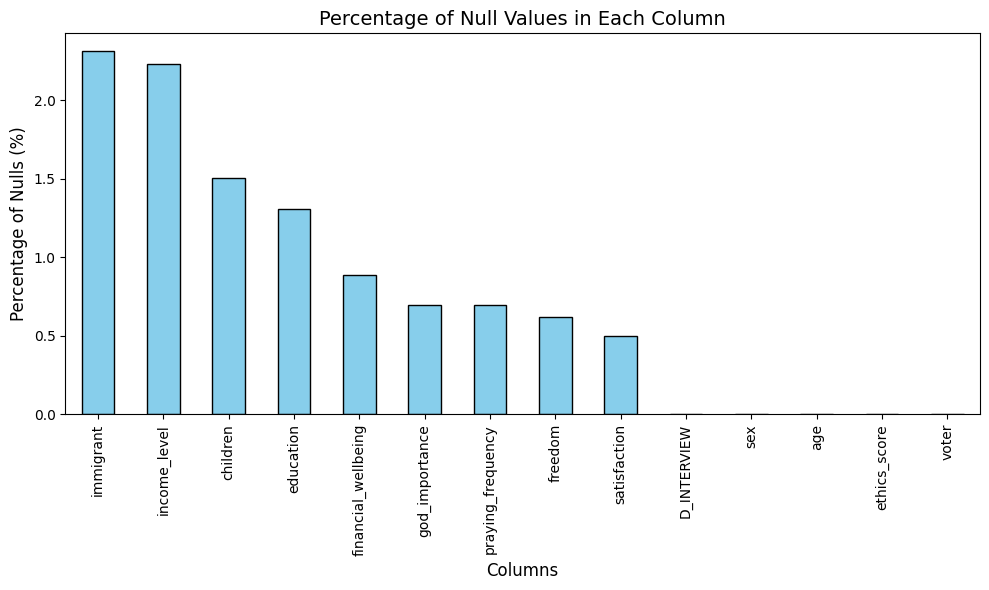

In [96]:
import matplotlib.pyplot as plt

# Calculate the percentage of null values for each column
null_percentages = countries.isna().mean() * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
null_percentages.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Null Values in Each Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage of Nulls (%)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

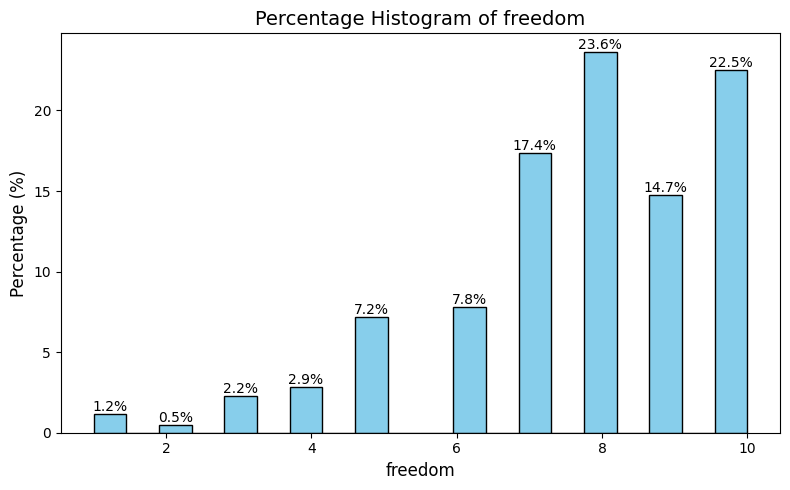

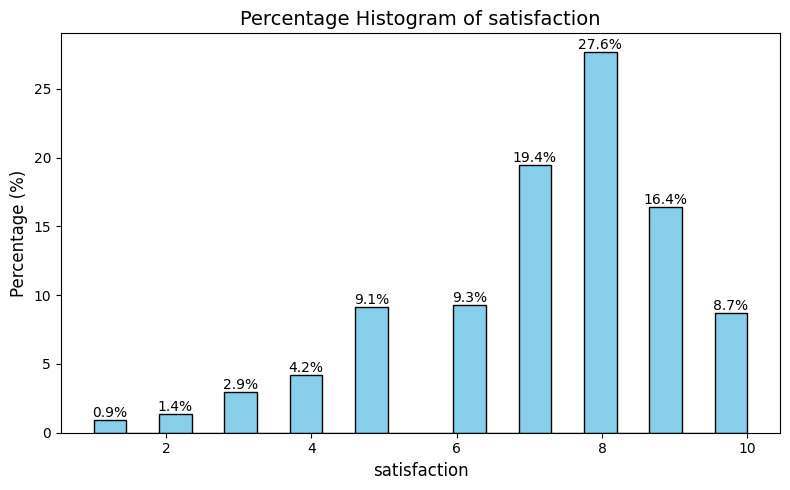

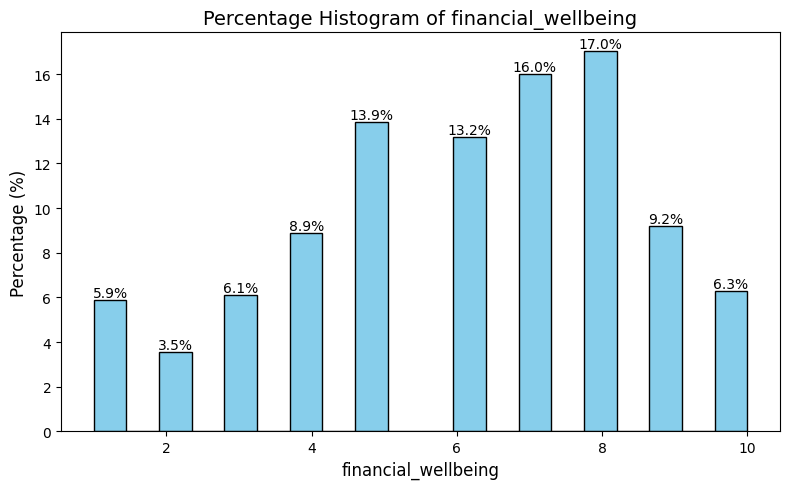

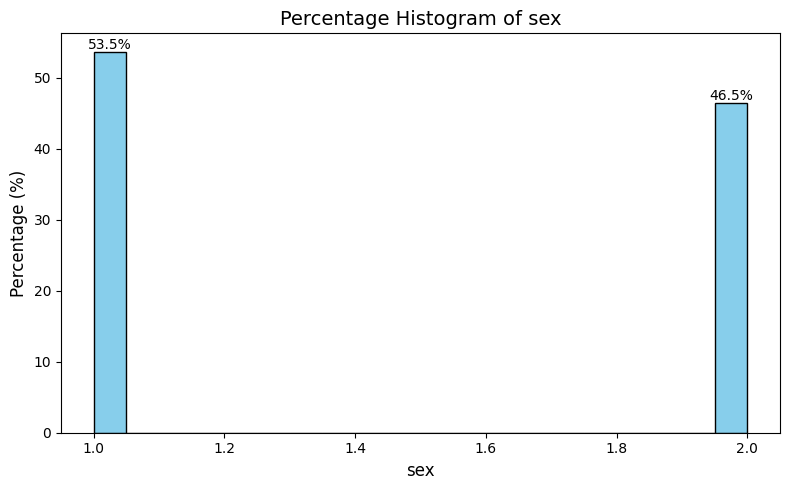

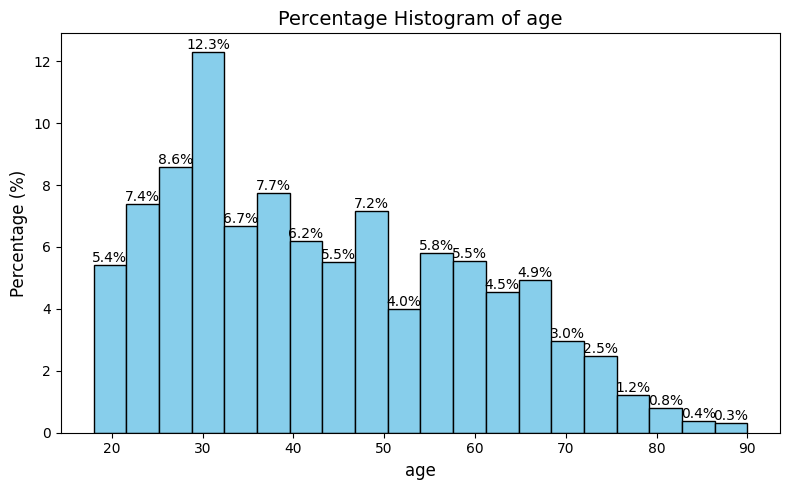

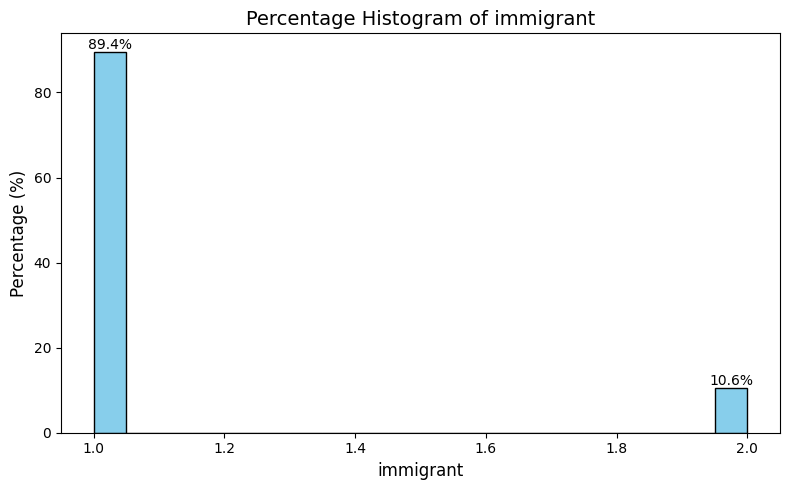

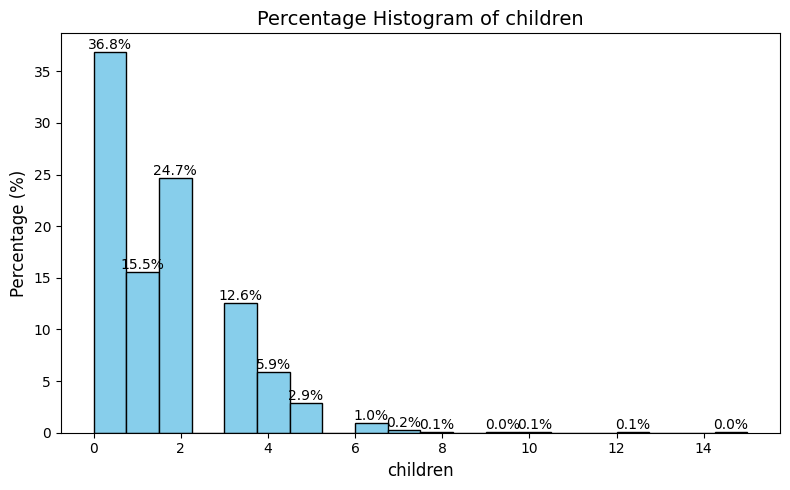

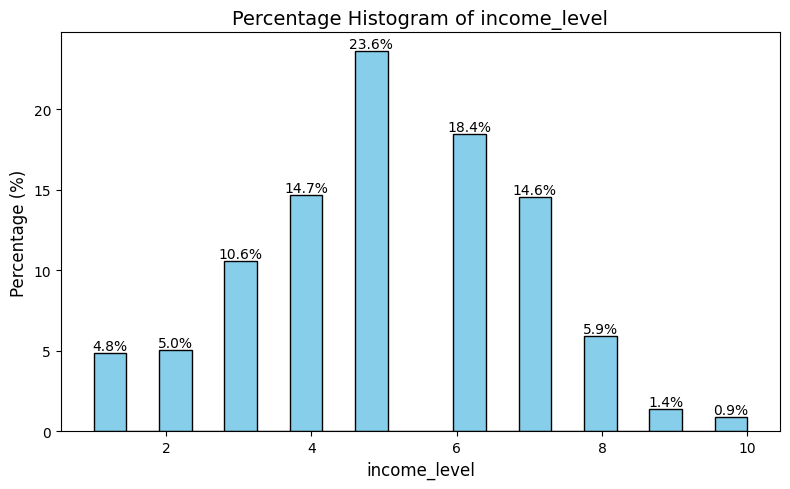

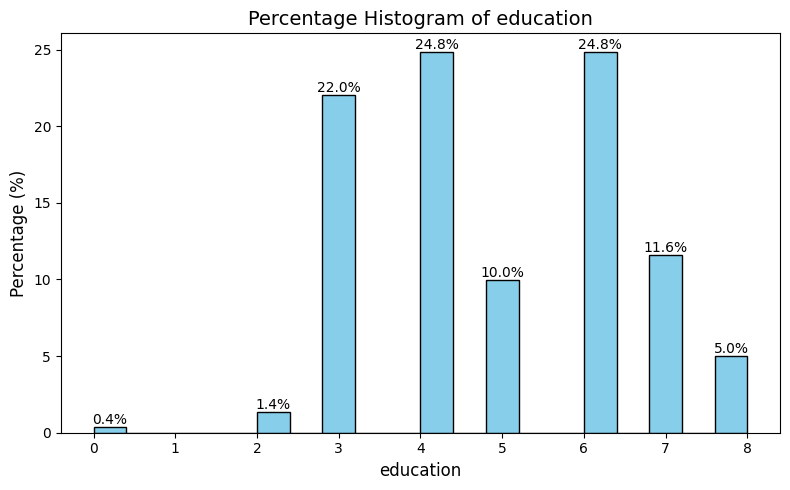

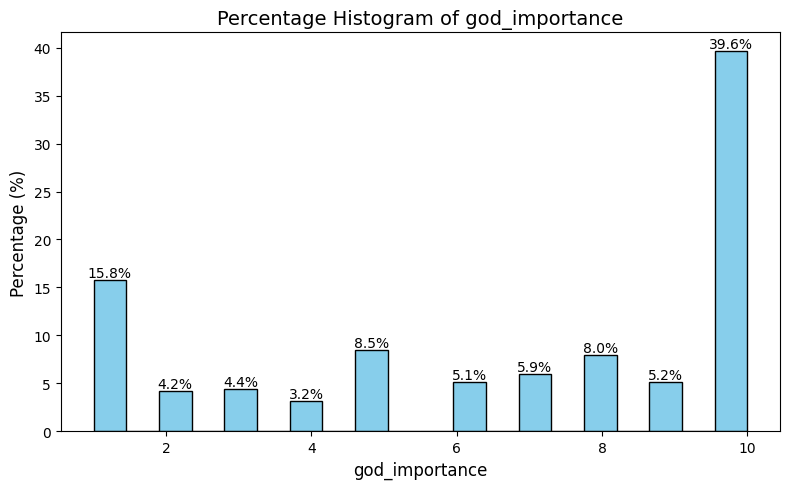

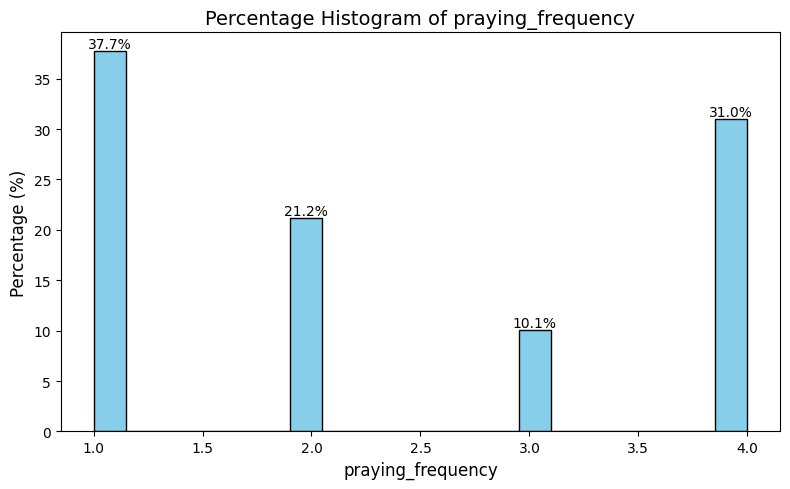

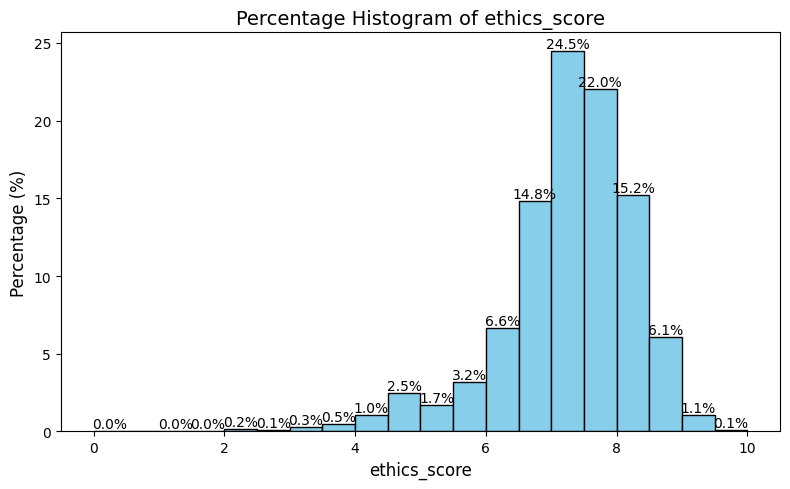

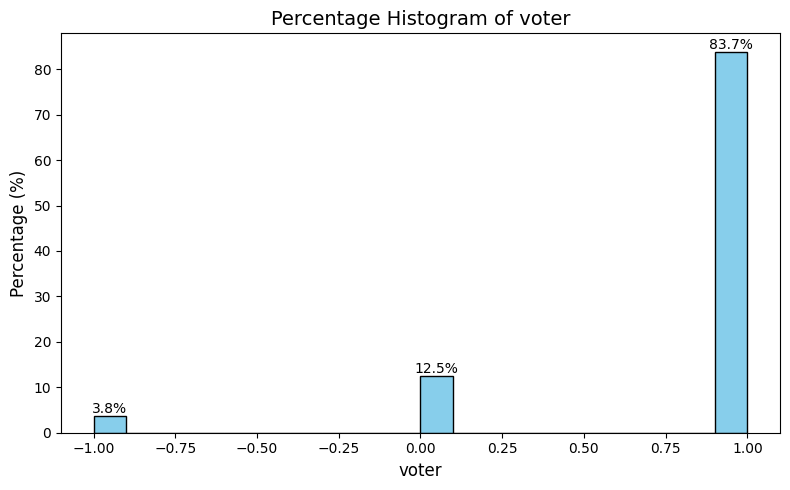

In [100]:
# Exclude 'D_INTERVIEW' and plot histograms for all other columns with percentages and data labels
columns_to_plot = [col for col in countries.columns if col != 'D_INTERVIEW']

# Plot histograms
for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    
    # Prepare data and weights
    data = countries[col].dropna()
    weights = (np.ones_like(data) / len(data)) * 100  # Calculate weights for percentage
    
    # Plot the histogram
    counts, bins, patches = plt.hist(data, bins=20, color='skyblue', edgecolor='black', weights=weights)
    
    # Add data labels
    for count, patch in zip(counts, patches):
        if count > 0:  # Show label only for non-zero bins
            plt.text(patch.get_x() + patch.get_width() / 2, count, f'{count:.1f}%', 
                     ha='center', va='bottom', fontsize=10)
    
    # Customize the plot
    plt.title(f'Percentage Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Removing technical & redundant columns
# 'Q152','Q153','Q154','Q155','Q156','Q157',
# countries.drop(
#     columns=['version','doi','A_WAVE','A_STUDY','A_YEAR','B_COUNTRY', 'X003R', 'B_COUNTRY_ALPHA', 'C_COW_NUM','C_COW_ALPHA','Q_MODE','S007','N_REGION_ISO','N_TOWN','N_REGION_NUTS2','N_REG_NUTS1','J_INTDATE','FW_START','FW_END','K_TIME_START','K_TIME_END','G_TOWNSIZE','I_PSU','S_INTLANGUAGE','Q33','Q34','Q35','Partyname','O1_LONGITUDE','O2_LATITUDE'],
#     inplace = True
# )

# Removing columns with no distinct data
# distinct = pd.DataFrame({
#     'column_name': countries.columns,
#     'distinct_values': [countries[col].nunique() for col in countries.columns]
# })
# distinct = distinct[~(distinct['column_name'] == 'B_COUNTRY_ALPHA')]
# countries.drop(
#     columns = list(distinct[(distinct['distinct_values'] == 1) | (distinct['distinct_values'] == 0)]['column_name']),
#     inplace = True
# )

# Removing columns with only null values
# countries.drop(
#     columns = countries.columns[countries.isnull().all()].tolist(),
#     inplace = True
# )

# # Set threshold for columns with missing values
# missing_percentage_df = pd.DataFrame(countries.isnull().mean() * 100, columns=['Missing_Percentage']).reset_index()
# missing_percentage_df.rename(columns={'index': 'Column'}, inplace=True)
# missing_percentage_df = missing_percentage_df.sort_values(by='Missing_Percentage', ascending=False)

# countries.drop(columns = list(missing_percentage_df[missing_percentage_df['Missing_Percentage'] >= 10]['Column'].unique()), inplace=True)


# Replace missing values with NaN
# cols = list(set(countries.columns)-{'N_REGION_ISO','N_TOWN'})
# countries[cols] = countries[cols].replace([-1, -2, -3, -4, -5], np.nan)